# Test rotated-lensed Cl,  and compare it with lensed-raw Cl and rotated-raw Cl

In [20]:
# import necessary modules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from classy import Class
from math import pi
mpl.rcParams['font.size']=13.5

In [21]:
def setup_axis(ax, xlabel=None, ylabel=None, xscale=None, yscale=None, 
               fs=18, title=None):
    if xlabel: ax.set_xlabel(xlabel, fontsize=fs)
    if ylabel: ax.set_ylabel(ylabel, fontsize=fs)
    if xscale: ax.set_xscale(xscale)
    if yscale: ax.set_yscale(yscale)
    if title:  ax.set_title(title, fontsize=fs)
    return ax

In [22]:
# Only get raw Cl
if 0:
    raw_params = {
        "output" : " tCl , pCl" ,
        "l_max_scalars" : 4000,
    }
    cosmo = Class()
    cosmo.set(raw_params)
    cosmo.compute(level=['harmonic'])
    raw_cls = cosmo.raw_cl()

In [18]:
# Only get lensed-raw Cl
if 0:
    lens_params = {
        "output" : " tCl , pCl, lCl" ,
        "l_max_scalars" : 4000,
        "lensing": 'yes'
    }
    cosmo = Class()
    cosmo.set(lens_params)
    cosmo.compute(level=['lensing'])
    lensed_cls = cosmo.lensed_cl()

In [ ]:
# Get rotated-lensed Cl
params = {
    "output" : " tCl, pCl, lCl, rCl" ,
    "l_max_scalars" : 4000,
    "lensing": 'yes',
    "rotation": 'yes',
    "alpha" : 0.1,
    "A_cb" : 1E-5 ,
}

cosmo = Class()
cosmo.set(params)
cosmo.compute(level=['rotation'])

raw_cls = cosmo.raw_cl()
lensed_cls = cosmo.lensed_cl()
rotated_lensed_cls = cosmo.rotated_cl()

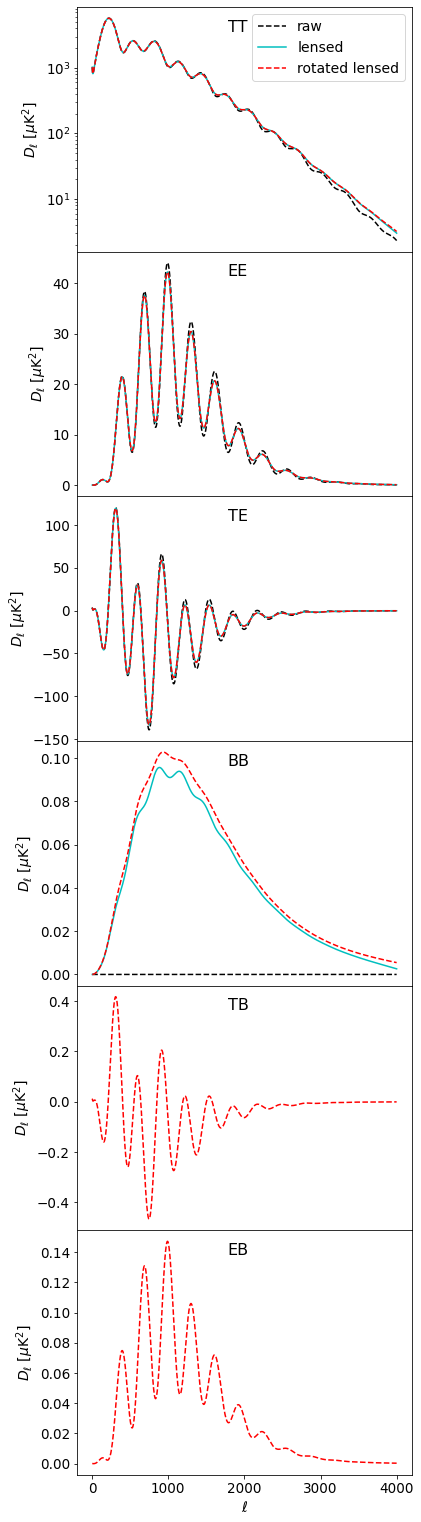

In [19]:
ellmax = 4000
ells = rotated_lensed_cls['ell']
factor = ells*(ells+1)/(2*pi)
figsize = (6, 27)
Tcmb = 2.72e6

fig, axes = plt.subplots(6,1,figsize=figsize,sharex=True)
axes[0].plot(ells[2:], Tcmb**2*(factor*raw_cls['tt'][:ellmax+1])[2:], 'k--', label='raw')
axes[0].plot(ells[2:], Tcmb**2*(factor*lensed_cls['tt'][:ellmax+1])[2:], 'c-', label='lensed')
axes[0].plot(ells[2:], Tcmb**2*(factor*rotated_lensed_cls['tt'][:ellmax+1])[2:], 'r--',label='rotated lensed')

axes[1].plot(ells[2:], Tcmb**2*(factor*raw_cls['ee'][:ellmax+1])[2:], 'k--', label='raw')
axes[1].plot(ells[2:], Tcmb**2*(factor*lensed_cls['ee'][:ellmax+1])[2:], 'c-', label='lensed')
axes[1].plot(ells[2:], Tcmb**2*(factor*rotated_lensed_cls['ee'][:ellmax+1])[2:], 'r--',label='rotated lensed')

axes[2].plot(ells[2:], Tcmb**2*(factor*raw_cls['te'][:ellmax+1])[2:], 'k--', label='raw')
axes[2].plot(ells[2:], Tcmb**2*(factor*lensed_cls['te'][:ellmax+1])[2:], 'c-', label='lensed')
axes[2].plot(ells[2:], Tcmb**2*(factor*rotated_lensed_cls['te'][:ellmax+1])[2:], 'r--',label='rotated lensed')

axes[3].plot(ells[2:], Tcmb**2*(factor*raw_cls['bb'][:ellmax+1])[2:], 'k--', label='raw')
axes[3].plot(ells[2:], Tcmb**2*(factor*lensed_cls['bb'][:ellmax+1])[2:], 'c-', label='lensed')
axes[3].plot(ells[2:], Tcmb**2*(factor*rotated_lensed_cls['bb'][:ellmax+1])[2:], 'r--',label='rotated lensed')

axes[4].plot(ells[2:], Tcmb**2*(factor*rotated_lensed_cls['tb'][:ellmax+1])[2:], 'r--',label='rotated lensed')

axes[5].plot(ells[2:], Tcmb**2*(factor*rotated_lensed_cls['eb'][:ellmax+1])[2:], 'r--',label='rotated lensed')

for ax, sp in zip(axes,['TT','EE','TE','BB','TB','EB']):
    ax.set_ylabel('$D_\ell$ [$\mu$K$^2$]', fontsize=14)
    ax.text(0.45, 0.9, sp, fontsize=16, transform=ax.transAxes)

axes[0].set_yscale('log')

axes[0].legend(fontsize=14)     
axes[5].set_xlabel('$\ell$', fontsize=14)                                                                                                                                                         
fig.subplots_adjust(hspace=0)